Part 1. Data exploration

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
train=pd.read_csv('D:/Users/huawei/Documents/GitHub/FLIP00/Data/train.csv',header=0)
test=pd.read_csv('D:/Users/huawei/Documents/GitHub/FLIP00/Data/test.csv',header=0)

train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

1. Missing value check

In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6

The data has no missing values.

2.Outlier check

In [4]:
# Statistical description
train.describe().T

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

In [5]:
#themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
sns.set_palette(sns.color_palette('pastel'), 10)

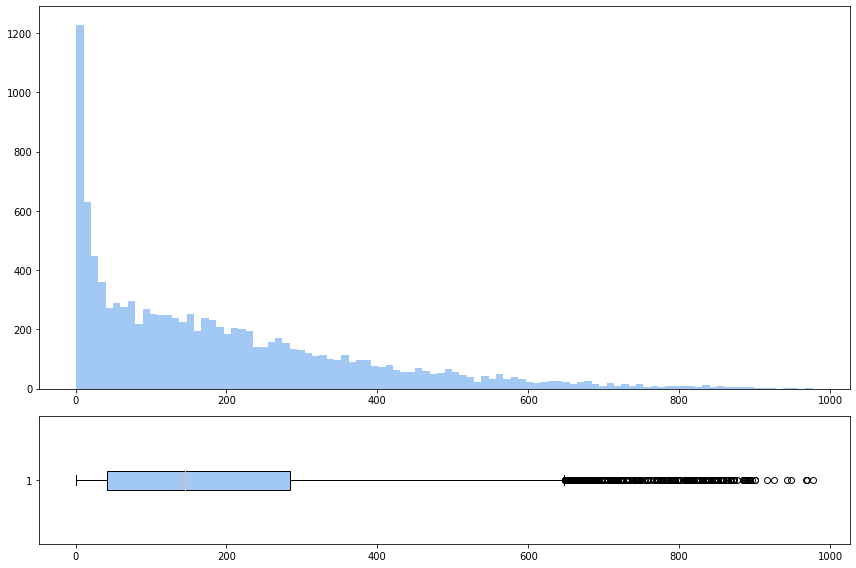

In [6]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
plt.subplots_adjust( bottom=0,  wspace=0, hspace=0)
ax0 = plt.subplot(gs[0])
ax0.hist(train['count'],bins=100)
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.boxplot(train['count'],vert=False,patch_artist=True)
plt.tight_layout()
plt.savefig('Count distribution.png')

Count: mean 191, standard deviation 181, the 50% quantile is 145, the 75% quantile is 284, and the maximum is 977, indicating that there is a long tail on the right.
The overall distribution skew is quite serious, which needs to be dealt with in order to avoid overfitting at last.
According to the principle of 3sigma, we exclude the data beyond 3 standard deviations, then take the log transform of count and look at the distribution after the transformation.


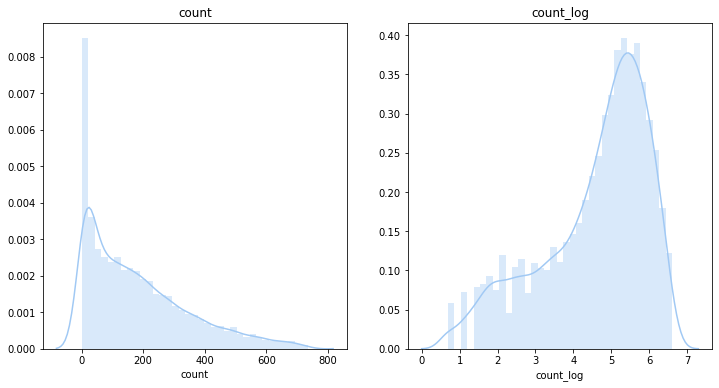

In [7]:
# Data values greater than μ+3σ are taken as outliers
train=train[np.abs(train['count']-train['count'].mean())<=3*train['count'].std()]

train['count'+'_log'] = np.log1p(train['count'])
f, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))
sns.distplot(train['count'], ax=ax1)
ax1.set_title('count')
sns.distplot(train['count'+'_log'], ax=ax2)
ax2.set_title('count'+'_log')
plt.savefig('Count distribution compare.png')

We see that after the transformation, the distribution of the graph is less skewed and the differences are smaller.

3.Features of decomposition

In [8]:
#To facilitate data cleaning, we combine the training set with the test set.
data=pd.concat([train,test],ignore_index=True)

#Divide time into year, month, day, week, and hour.
data['date']=data.datetime.apply(lambda x:x.split()[0])
data['hour']=data.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')
data['year']=data.datetime.apply(lambda x:x.split()[0].split('-')[0]).astype('int')
data['month']=data.datetime.apply(lambda x:x.split()[0].split('-')[1]).astype('int')
data['weekday']=data.date.apply( lambda x : datetime.strptime(x,'%Y-%m-%d').isoweekday())


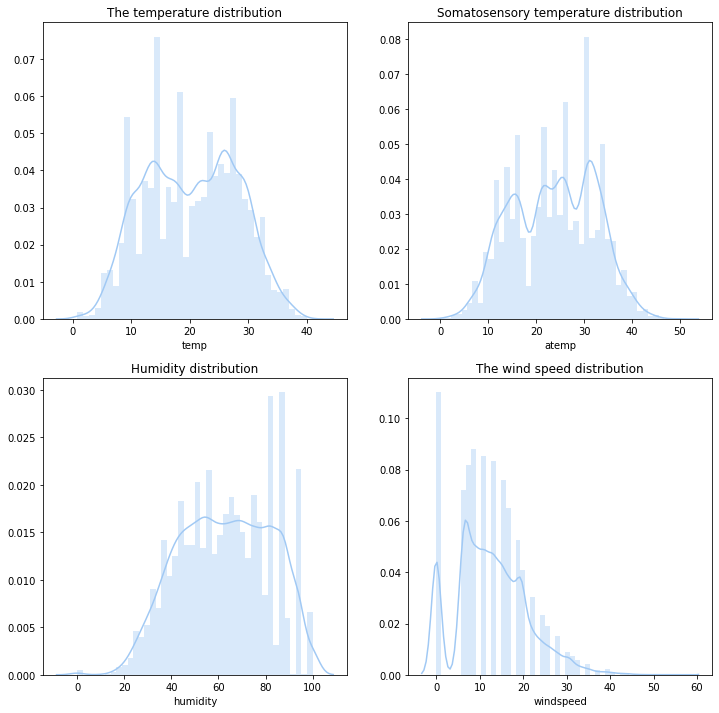

In [9]:
fig,axes=plt.subplots(2,2)
fig.set_size_inches(12,12)
sns.distplot(data['temp'],ax=axes[0,0])
sns.distplot(data['atemp'],ax=axes[0,1])
sns.distplot(data['humidity'],ax=axes[1,0])
sns.distplot(data['windspeed'],ax=axes[1,1])
axes[0,0].set(xlabel='temp',title='The temperature distribution')
axes[0,1].set(xlabel='atemp',title='Somatosensory temperature distribution')
axes[1,0].set(xlabel='humidity',title='Humidity distribution')
axes[1,1].set(xlabel='windspeed',title='The wind speed distribution')

plt.savefig('Features distribution analysis.png')


In [10]:
#The cross validation method is used to adjust the parameters of the random forest. The optimal parameters are selected from the internal bagging framework and tree respectively, and then the model is established for prediction.
#The same features of year, month, season, temperature, humidity, etc. all affect wind speed, so these features are chosen here for prediction.
speed_null=data[data['windspeed']==0]
speed_notnull=data[data['windspeed']!=0]

windspeed_trainX=speed_notnull[['season','weather','humidity','month','temp','year','atemp']]
windspeed_trainY=speed_notnull['windspeed']
windspeed_testX=speed_null[['season','weather','humidity','month','temp','year','atemp']]

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

rf=RandomForestRegressor(random_state=10)

param1={'n_estimators':list(range(100,500,50))}
model1=GridSearchCV(estimator = rf,param_grid = param1, scoring='neg_mean_squared_log_error',cv=5)
model1.fit(windspeed_trainX,windspeed_trainY)
model1.best_score_
model1.best_params_

param2={'max_depth':list(range(3,10,1)),'min_samples_split':list(range(10,20,2))}
model2=GridSearchCV(estimator = RandomForestRegressor(random_state=10,n_estimators=450),param_grid = param2, scoring='neg_mean_squared_log_error',cv=5)
model2.fit(windspeed_trainX,windspeed_trainY)
model2.best_score_
model2.best_params_

print(model1.best_params_)
print(model2.best_params_)

{'n_estimators': 450}
{'max_depth': 9, 'min_samples_split': 10}


In [11]:
speed_model=RandomForestRegressor(n_estimators=450,random_state=10,max_depth=9,min_samples_split=10)
speed_model.fit(windspeed_trainX,windspeed_trainY)
windspeed_testY=speed_model.predict(windspeed_testX)
data.loc[data.windspeed==0,'windspeed']=windspeed_testY

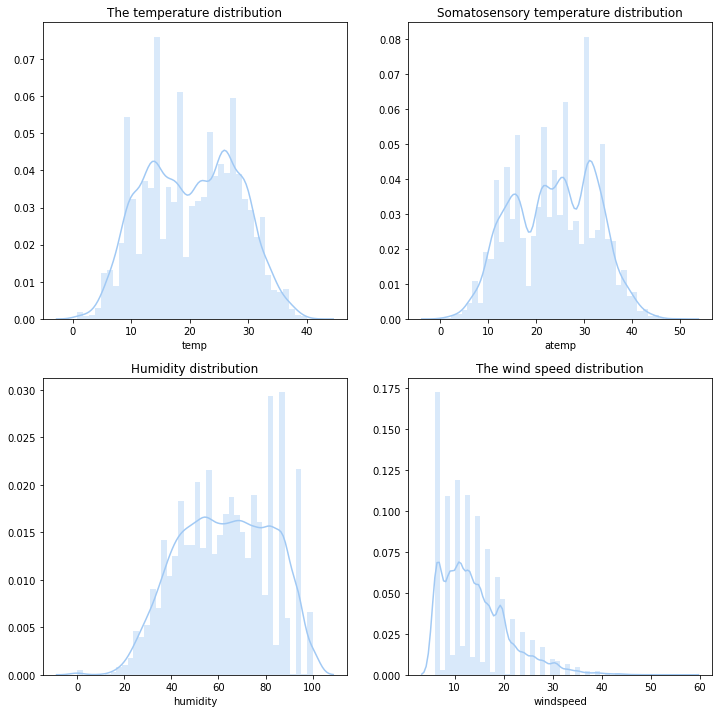

In [12]:
fig,axes=plt.subplots(2,2)
fig.set_size_inches(12,12)
sns.distplot(data['temp'],ax=axes[0,0])
sns.distplot(data['atemp'],ax=axes[0,1])
sns.distplot(data['humidity'],ax=axes[1,0])
sns.distplot(data['windspeed'],ax=axes[1,1])
axes[0,0].set(xlabel='temp',title='The temperature distribution')
axes[0,1].set(xlabel='atemp',title='Somatosensory temperature distribution')
axes[1,0].set(xlabel='humidity',title='Humidity distribution')
axes[1,1].set(xlabel='windspeed',title='The wind speed distribution')

plt.savefig('After features distribution analysis.png')


Part 2. Data visualization

1. Time characteristic analysis

In [13]:
group_hour=data.groupby(data.hour)
hour_mean=group_hour[['count','registered','casual']].mean()
fig=plt.figure(figsize=(12,8))
plt.plot(hour_mean['count'],label='count')
plt.plot(hour_mean['registered'],label='registered')
plt.plot(hour_mean['casual'],label='casual')

plt.title('The amount rented at different times of the day')
plt.legend(loc=2)
plt.savefig('Time trends_day.png')


As can be seen from the graph above, there are two peaks in the graph, one is from 7-8 in the morning, the other is from 5-6 in the afternoon, which is the morning peak and the evening peak respectively, which is in line with the actual situation.
Let's take a look at the difference in time of day between working and non-working days.

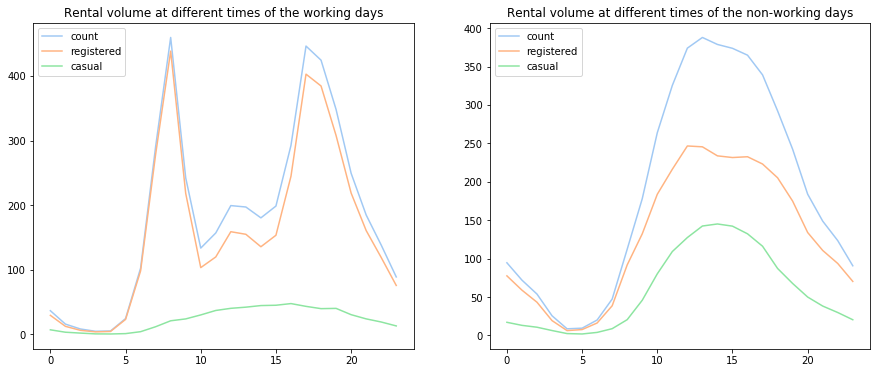

In [14]:
workingday_df=data[data['workingday']==1]
group_working=workingday_df.groupby('hour')
hour1_mean=group_working[['count','registered','casual']].mean()
noworkingday_df=data[data['workingday']==0]
group_noworking=noworkingday_df.groupby('hour')
hour2_mean=group_noworking[['count','registered','casual']].mean()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hour1_mean['count'],label='count')
plt.plot(hour1_mean['registered'],label='registered')
plt.plot(hour1_mean['casual'],label='casual')
plt.title('Rental volume at different times of the working days')
plt.legend(loc=2)
plt.subplot(1,2,2)
plt.plot(hour2_mean['count'],label='count')
plt.plot(hour2_mean['registered'],label='registered')
plt.plot(hour2_mean['casual'],label='casual')
plt.title('Rental volume at different times of the non-working days')
plt.legend(loc=2)
plt.savefig('time trends_weekday.png')


From above we can see, from Monday to Friday, 8 in the morning of the day - 9 am and 5 to 7 PM, usage is more, may be caused by time going to work in the morning and evening after work time, include the reason of eating out at the same time, for the weekend, time is more focused, basic usage around 11 PM to 5 PM,
This time is supposed to be everyone's leisure time.

In [15]:
data_year=data.groupby(['hour','year']).mean().unstack()['count']

plt.figure(figsize=(12,8))
plt.plot(data_year)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly comparison of the number of rental bike per hour')
plt.legend(data['year'].unique(),loc=0,frameon=False)
#plt.xticks( 'Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec')
plt.savefig('month.png')
plt.show()

Visualization of the relationship between bike rental number and time

In [16]:
data_season=data.groupby(['hour','season']).mean().unstack()['count']

plt.figure(figsize=(12,8))
plt.plot(data_season)
plt.xlabel('season')
plt.ylabel('Count')
plt.title('Seasonal comparison of the number of rental bike per hour')
plt.legend(data['season'].unique(),loc=0,frameon=False)
plt.xticks( np.arange(24) )h
plt.savefig('season.png')
plt.show()

SyntaxError: invalid syntax (<ipython-input-16-88b84edfb587>, line 9)

从上图我们可以看出，春天的使用量明显偏少，可能是温度较低的原因，同时，早上八点和晚上5点左右使用较多

As can be seen from the above diagram, the usage is obviously lower in spring, probably due to the lower temperature. Meanwhile, the usage is higher around 8 am and 5 PM

In [20]:
data_holiday = data.groupby(['hour', 'holiday']).mean().unstack()['count']

plt.figure(figsize=(12,8))
plt.plot(data_holiday)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Seasonal comparison of the number of rental bike per hour')
plt.legend(list(data_holiday),loc=0,frameon=False)
plt.xticks( np.arange(24) )
plt.savefig('hol.png')
plt.show()




The influence of temperature, humidity and demeanor on the number of shared bike rentals

In [161]:
#Temperature
plt.figure(figsize=(12,8))
plt.scatter(x="temp", y="count", data=train)
plt.xlabel('Temp')
plt.ylabel('Number Of Total Rentals Per Hour')
plt.xticks([])
#plt.title('Overview of the Number of Total Rentals Per Hour')
poly = np.polyfit(data['temp'], train['count'], 1)
z=np.polyval(poly, data['temp'])
plt.plot(data['temp'], z, '-.')
plt.savefig('Temperature.png')
plt.show()

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


In [162]:
#Windspeed
plt.figure(figsize=(12,8))
plt.scatter(x="windspeed", y="count", data=train)
plt.xlabel('Windspeed')
plt.ylabel('Number Of Total Rentals Per Hour')
plt.xticks([])
#plt.title('Overview of the Number of Total Rentals Per Hour')
poly = np.polyfit(data['windspeed'], train['count'], 1)
z=np.polyval(poly, data['windspeed'])
plt.plot(data['windspeed'], z, '-.')
plt.savefig('Windspeed.png')
plt.show()

In [163]:

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(18, 5)
sns.set(style='white')
sns.despine()
ax1=sns.regplot(x="temp", y="count", data=data,ax=ax1)
ax2=sns.regplot(x="windspeed", y="count", data=data,ax=ax2)
ax3=sns.regplot(x="humidity", y="count", data=data,ax=ax3)

#ax1.set(xlabel='temp',ylabel='count')
ax1.set_xlabel('temp',fontsize=15)
ax1.set_ylabel('count',fontsize=15)
ax2.set_xlabel('windspeed',fontsize=15)
ax2.set_ylabel('count',fontsize=15)
ax3.set_xlabel('humidity',fontsize=15)
ax3.set_ylabel('count',fontsize=15)
plt.savefig('weather.png')

Text(0, 0.5, 'count')

气温低于10，高于30度，租车人数较少-太冷太热都会抑制租车需求

风速越大，租车人数越少-大风抑制租车需求

空气湿度越高，租车人数越少-干爽的天气骑车比较舒适

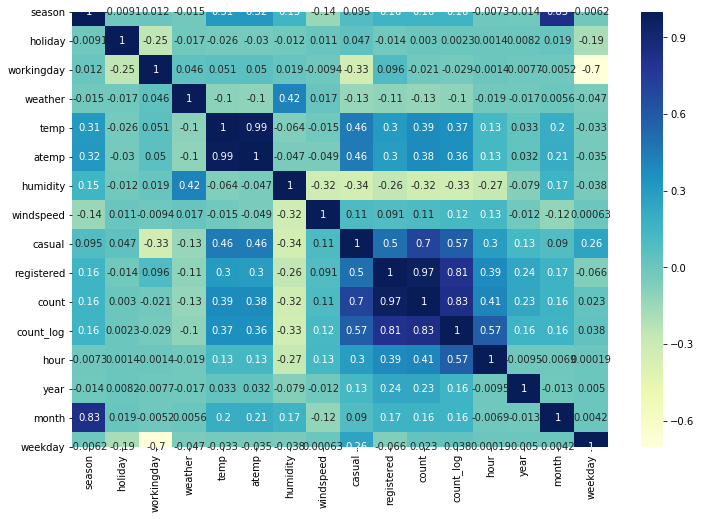

In [19]:
cor=data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(cor,annot=True,vmax=1,cmap='YlGnBu')
plt.savefig('cor.png')
plt.show()

In [20]:
cor['count'].sort_values(ascending=False)

count         1.000000
registered    0.966209
count_log     0.832871
casual        0.704764
hour          0.405437
temp          0.385954
atemp         0.381967
year          0.234959
month         0.164673
season        0.159801
windspeed     0.106414
weekday       0.022602
holiday       0.002978
workingday   -0.020764
weather      -0.127519
humidity     -0.317028
Name: count, dtype: float64

In [22]:
data_back=data
dummies_month = pd.get_dummies(data['month'], prefix='month')
dummies_year = pd.get_dummies(data['year'], prefix='year')
dummies_season = pd.get_dummies(data['season'], prefix='season')
dummies_weather = pd.get_dummies(data['weather'], prefix='weather')


In [23]:
data.columns
train_df=data.loc[data['count'].isnull()==False]
test_df=data.loc[data['count'].isnull()==True]
datetime_col=test_df['datetime']
ylables=train_df['count']
log_y=np.log(ylables)
drop_columns=['casual','count','datetime','date','registered','atemp','month','season','weather','year']
train_df=train_df.drop(drop_columns,axis=1)
test_df=test_df.drop(drop_columns,axis=1)


Part 3.Models

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
labels=log_y
x_train,x_test,y_train,y_test=train_test_split(train_df,labels,train_size=0.8)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(8591, 8)
(2148, 8)
(8591,)
(2148,)


In [17]:
param_1={'n_estimators':list(range(300,1000,50))}
model_1=GridSearchCV(estimator = rf,param_grid = param_1, scoring='neg_mean_squared_error',cv=5)
model_1.fit(x_train,y_train)
model_1.best_score_
model_1.best_params_
param_2={'max_depth':list(range(3,10,1)),'min_samples_split':list(range(10,20,2))}
model_2=GridSearchCV(estimator = RandomForestRegressor(random_state=10,n_estimators=900),param_grid = param_2, scoring='neg_mean_squared_error',cv=5)
model_2.fit(windspeed_trainX,windspeed_trainY)
model_2.best_score_
model_2.best_params_
print(model_1.best_params_)
print(model_2.best_params_)

NameError: name 'x_train' is not defined

In [ ]:
model_final=RandomForestRegressor(n_estimators=900,random_state=10,min_samples_split=10,max_depth=9)
model_final.fit(x_train,y_train)
predict_final=model_final.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,predict_final)


In [ ]:
test_pred=model_final.predict(test_df)
final_df=pd.DataFrame({'datetime':datetime_col,'count':np.exp(test_pred)})
final_df.to_csv('D:/Users/huawei/Documents/GitHub/FLIP00/Data/result-final.csv')
